/var/folders/s6/nfbpxj3172954y6cm4910knw0000gn/T/ipykernel_60728/866347482.py:84: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


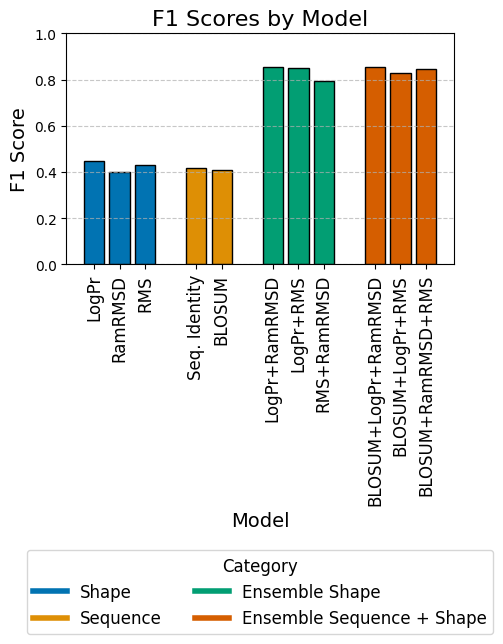

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import pandas as pd

# Data preparation
data = {
    "Category": ["Shape"] * 3 + ["Sequence"] * 2 + ["Ensemble Shape"] * 3 + ["Ensemble Sequence + Shape"] * 3,
    "Model": [
        "LogPr", "RamRMSD", "RMS",
        "Seq. Identity", "BLOSUM",
        "LogPr+RamRMSD", "LogPr+RMS", "RMS+RamRMSD",
        "BLOSUM+LogPr+RamRMSD", "BLOSUM+LogPr+RMS", "BLOSUM+RamRMSD+RMS"
    ],
    "F1 Score": [
        0.4470, 0.3988, 0.4320,
        0.4185, 0.4096,
        0.8539, 0.8515, 0.7935,
        0.8534, 0.8273, 0.8455
    ]
}

df = pd.DataFrame(data)
# Enhanced Plotting with Seaborn Palette
plt.figure(figsize=(5, 3))

# Use Seaborn color palette
palette = sns.color_palette("colorblind", n_colors=df['Category'].nunique())

# Map categories to palette
category_colors = {category: palette[i] for i, category in enumerate(df['Category'].unique())}

# Define positions with space between categories
x_positions = []
current_pos = 0
for category in df['Category'].unique():
    models_in_category = df[df['Category'] == category]
    for _ in models_in_category['Model']:
        x_positions.append(current_pos)
        current_pos += 1
    current_pos += 1  # Add extra space between categories

# Create the bar chart
bars = plt.bar(
    x_positions,
    df['F1 Score'],
    color=[category_colors[cat] for cat in df['Category']],
    edgecolor='black'
)

# Adjust x-ticks
plt.xticks(
    x_positions,
    df['Model'],
    rotation=90,
    ha='center',
    fontsize=12
)

# Adding details
plt.title("F1 Scores by Model", fontsize=16)
plt.xlabel("Model", fontsize=14)
plt.ylabel("F1 Score", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1)
# # Move the legend below the plot
plt.legend(
    handles=[plt.Line2D([0], [0], color=clr, lw=4) for clr in category_colors.values()],
    labels=category_colors.keys(),
    title="Category",
    loc='upper center',
    bbox_to_anchor=(0.5, -1.2),  # Push legend further down
    ncol=2,
    fontsize=12,
    title_fontsize=12
)

# plt.tight_layout()

# Save as PDF
output_path = "F1_scores_by_model.pdf"
# Adjust layout before saving
plt.tight_layout()

# Save the figure and include the legend fully
plt.savefig(output_path, format='pdf', bbox_inches='tight')

# Display the plot (only after saving to avoid interference)
plt.show()
